<a href="https://colab.research.google.com/github/ardakayaa/3d_Curtain_Model/blob/main/Curtain_Math_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/reiniscimurs/Bezier-Curve/main/Bezier.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('Bezier.py', 'w') as f:
    f.write(r.text)

# now we can import
import Bezier 

In [6]:
from Bezier import QuadBezier

Creating a random quadratic Bezier curve


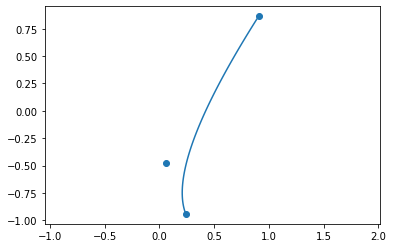

In [13]:

print("Creating a random quadratic Bezier curve")
curve = QuadBezier()
curve.random(min=-1,max=1)
curve.plot()